In [1]:
%matplotlib inline
from fastai.basics import *

## Target Vector

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)
x[:,0].uniform_(-1, 1)
x[:5]

tensor([[-0.5764,  1.0000],
        [-0.8014,  1.0000],
        [ 0.2763,  1.0000],
        [ 0.7538,  1.0000],
        [ 0.1360,  1.0000]])

In [4]:
a = tensor(-4., -2); a

tensor([-4., -2.])

In [5]:
y = x@a + torch.rand(n)

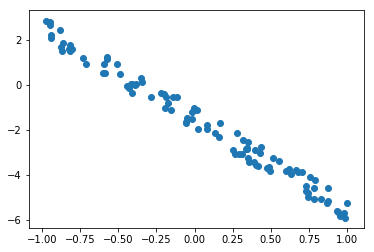

In [6]:
plt.scatter(x[:,0], y)

In [7]:
a = tensor(-1., 1).uniform_(-3., 3); a

tensor([ 1.4525, -2.5161])

In [8]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [9]:
y_hat = x@a

In [10]:
mse(y_hat, y)

tensor(10.7758)

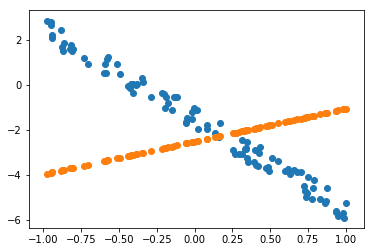

In [11]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

## Gradient Descent

In [12]:
a = nn.Parameter(a); a

Parameter containing:
tensor([ 1.4525, -2.5161], requires_grad=True)

In [13]:
def update(a, i = 1):
    y_hat = x@a
    loss = mse(y_hat, y)
    if i % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
    return a

In [14]:
lr = 0.1

In [15]:
for i in range(100):
    a = update(a, i)

tensor(10.7758, grad_fn=<MeanBackward1>)
tensor(2.6736, grad_fn=<MeanBackward1>)
tensor(0.7334, grad_fn=<MeanBackward1>)
tensor(0.2574, grad_fn=<MeanBackward1>)
tensor(0.1405, grad_fn=<MeanBackward1>)
tensor(0.1118, grad_fn=<MeanBackward1>)
tensor(0.1048, grad_fn=<MeanBackward1>)
tensor(0.1030, grad_fn=<MeanBackward1>)
tensor(0.1026, grad_fn=<MeanBackward1>)
tensor(0.1025, grad_fn=<MeanBackward1>)


In [16]:
a

Parameter containing:
tensor([-4.0280, -1.5280], requires_grad=True)

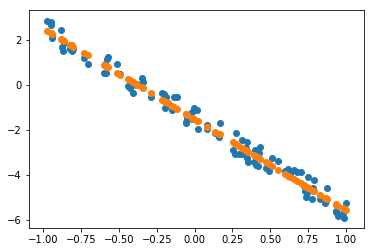

In [17]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);